In [20]:
!pip install tensorflow
!pip install keras

ModuleNotFoundError: No module named 'tenserflow'

In [25]:
#import data
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


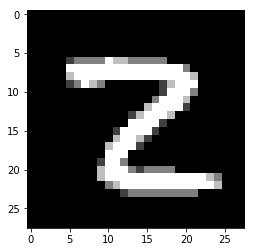

In [26]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[58000],cmap='gray')
plt.show()

In [27]:
ytrain[58000]

2

In [28]:
#input neurons =28*28=784
#output neurons

In [29]:
#one hot encoding
#when having multiple values then encoding is done for both test case and train case to avoid multiple predictions 
from tensorflow.keras.utils import to_categorical
ytrain =to_categorical(ytrain)
ytest=to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


In [30]:
from tensorflow.keras import models,layers

In [34]:
model=models.Sequential()#it makes an empty neural network
#add input layer-add a flattern layer>>28*28>>1*784
model.add(layers.Flatten(input_shape=(28,28)))#flatten the data into 1,784 figure to pass through

#add a hidden layer
model.add(layers.Dense(100,activation='relu'))

#add a hidden layer
model.add(layers.Dense(50,activation='relu'))

#add output layer
model.add(layers.Dense(10,activation='softmax'))#softmax used for multiclasses 
#dense =weightedsum actiavtion function performed by this

In [35]:
#compile ANN
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#on optmizier the loss avove is the error calculation which is done by adam to reduce it
#train ANN
model.fit(xtrain,ytrain,epochs=10,batch_size=1000,verbose=True,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/sample - loss: 13.9321 - accuracy: 0.6774 - val_loss: 2.6904 - val_accuracy: 0.8412
Epoch 2/10
60000/60000 [==============================] - 1s 16us/sample - loss: 1.9780 - accuracy: 0.8593 - val_loss: 1.6338 - val_accuracy: 0.8823
Epoch 3/10
60000/60000 [==============================] - 1s 20us/sample - loss: 1.2334 - accuracy: 0.8887 - val_loss: 1.2279 - val_accuracy: 0.8910
Epoch 4/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.8828 - accuracy: 0.9046 - val_loss: 0.9726 - val_accuracy: 0.9049
Epoch 5/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6786 - accuracy: 0.9177 - val_loss: 0.8559 - val_accuracy: 0.9088
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.5504 - accuracy: 0.9244 - val_loss: 0.7700 - val_accuracy: 0.9174
Epoch 7/10
60000/60000 [==============================]

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
